# Decision Trees

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Loading data

In [2]:
data_path = '../preprocessing/preprocessed.csv'
data = pd.read_csv(data_path)

# Seleccionar la columna 'price_category' como variable objetivo
X = data.drop('price_category', axis=1)
y = data['price_category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Basic model

### Creation and training

In [3]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluation

In [4]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.81      0.80      1330
           2       0.65      0.65      0.65      1268
           3       0.72      0.69      0.70      1374
           4       0.73      0.74      0.74      1282
           5       0.87      0.88      0.88      1269

    accuracy                           0.75      6523
   macro avg       0.75      0.76      0.75      6523
weighted avg       0.75      0.75      0.75      6523

Confusion Matrix
[[1081  229   18    2    0]
 [ 253  819  181   15    0]
 [  21  208  952  184    9]
 [   1    4  171  952  154]
 [   0    0    6  143 1120]]


### Visualitzation

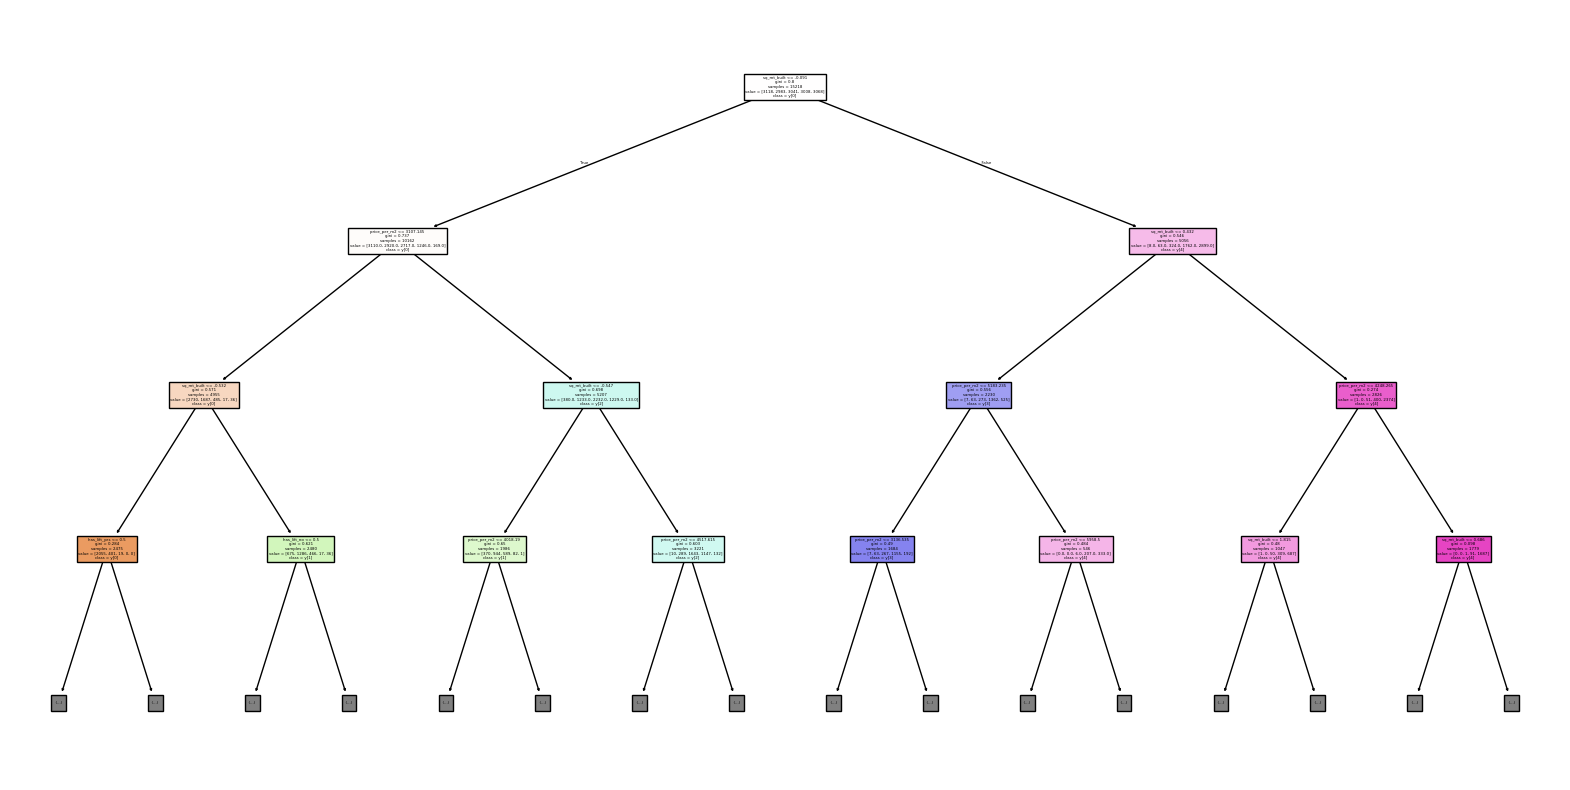

In [5]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, max_depth=3)
plt.show()

## Custom model

### Params selection

Los parámetros elegidos son los siguientes:
- criterion: Define la métrica utilizada para medir la calidad de las divisiones. Puede ser el índice de Gini (que mide la impureza) o la entropía (basada en information gain).
- splitter: Determina la estrategia para seleccionar la división en cada nodo. Puede buscar la mejor división posible o seleccionar una aleatoria entre las mejores opciones.
- max_depth: Limita la profundidad máxima del árbol, lo que ayuda a controlar el sobreajuste. Si se deja como `None`, el árbol crecerá hasta que todas las hojas sean puras o contengan menos muestras que el mínimo permitido.
- min_samples_split: Es el número mínimo de muestras necesarias para dividir un nodo. Valores más altos evitan divisiones excesivas y reducen el riesgo de sobreajuste.
- min_samples_leaf: Es el número mínimo de muestras que debe tener una hoja. Esto asegura que las hojas no sean demasiado pequeñas.
- min_impurity_decrease: Es el umbral mínimo de reducción de impureza requerido para realizar una división. Ayuda a evitar divisiones que no aporten suficiente valor.

In [6]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

### Creation and training

In [7]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_sampl

### Evaluation

In [8]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_best))

print('Most important features')
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      1330
           2       0.64      0.65      0.64      1268
           3       0.71      0.70      0.70      1374
           4       0.74      0.76      0.75      1282
           5       0.90      0.87      0.89      1269

    accuracy                           0.76      6523
   macro avg       0.76      0.76      0.76      6523
weighted avg       0.76      0.76      0.76      6523

Confusion Matrix
[[1086  226   17    1    0]
 [ 258  819  187    4    0]
 [  18  222  958  171    5]
 [   1   10  184  976  111]
 [   0    1    6  162 1100]]
Most important features
              Feature  Importance
1         sq_mt_built    0.532263
41       price_per_m2    0.267648
0               floor    0.025421
3             n_rooms    0.024173
12        has_lift_no    0.020174
4          built_year    0.019859
14       has_lift_yes    0.014163
10           has_po